In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# these are the classes that we need to impute 
# missing data with sklearn:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# to split the datasets
from sklearn.model_selection import train_test_split

In [9]:
# We use only the following variables for the demo,
# 3 of which contain NA:

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [3]:
# let's load the House Prices dataset

data = pd.read_csv('train.csv',usecols= cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [5]:
# Let's check the fraction of null values
print(data.isnull().sum())
data.isnull().mean()

LotFrontage    259
OverallQual      0
MasVnrArea       8
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
GarageYrBlt     81
WoodDeckSF       0
SalePrice        0
dtype: int64


LotFrontage    0.177397
OverallQual    0.000000
MasVnrArea     0.005479
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.055479
WoodDeckSF     0.000000
SalePrice      0.000000
dtype: float64

### Observations:
The Variables LotFrontage, MasVnrArea, GarageYrBlt contain missing data.

In [10]:
# let's separate into training and testing set

# first let's remove the target from the features
print(cols_to_use)
cols_to_use.remove('SalePrice')
cols_to_use

['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF', 'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice']


['OverallQual',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'WoodDeckSF',
 'BsmtUnfSF',
 'LotFrontage',
 'MasVnrArea',
 'GarageYrBlt']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(
            data[cols_to_use], # just the features
            data['SalePrice'], # the target
            test_size=0.3,  # the percentage of observations in the dataset
            random_state=0, # for reproducibility
) 

X_train.shape,X_test.shape

((1022, 9), (438, 9))

In [13]:
# let's check the missing data again
X_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

In [14]:
X_train.isnull().sum()

OverallQual      0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
WoodDeckSF       0
BsmtUnfSF        0
LotFrontage    189
MasVnrArea       5
GarageYrBlt     54
dtype: int64

### SimpleImputer on the entire dataset

In [21]:
# Now we impute the missing values with SimpleImputer.

# Create an instance of the simple imputer.
# We indicate that we want to impute with the median.
imputer = SimpleImputer(strategy='median')

# We fit the imputer to the train set.
# The imputer will learn the median of all variables.
imputer.fit(X_train[cols_to_use])

SimpleImputer(strategy='median')

##### Note:
If you want to do mean imputation instead of median, pass the argument 'mean' to 'strategy'.


In [23]:
imputer.statistics_

array([   6. ,  992. , 1095. , 1479. ,    0. ,  486.5,   69. ,    0. ,
       1979. ])

In [25]:
# And we can investigate the medians directly to corroborate 
# the imputer did a good job.
X_train.median()

OverallQual       6.0
TotalBsmtSF     992.0
1stFlrSF       1095.0
GrLivArea      1479.0
WoodDeckSF        0.0
BsmtUnfSF       486.5
LotFrontage      69.0
MasVnrArea        0.0
GarageYrBlt    1979.0
dtype: float64

##### Note:

The SimpleImputer learns the medians of ALL the variables in the dataset, those with NA and without NA.

In [27]:
# Now we impute the train and test sets. 

# Note: the data is returned as a numpy array!!!
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([[   7., 1057., 1057., ...,   69.,  573., 1998.],
       [   6., 1291., 1291., ...,   69.,    0., 1996.],
       [   5.,  858.,  858., ...,   50.,    0., 1979.],
       ...,
       [   6.,    0., 1318., ...,   68.,    0., 1978.],
       [   7., 1374., 1557., ...,   69.,   18., 2003.],
       [   7., 1195., 1195., ...,   58.,   30., 1998.]])

In [28]:
# If we wanted to continue our data analysis, we would have to 
# encode the train set back to a dataframe:

pd.DataFrame(X_train,columns=cols_to_use).head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
0,7.0,1057.0,1057.0,2034.0,576.0,318.0,69.0,573.0,1998.0
1,6.0,1291.0,1291.0,1291.0,307.0,288.0,69.0,0.0,1996.0
2,5.0,858.0,858.0,858.0,117.0,162.0,50.0,0.0,1979.0
3,6.0,560.0,698.0,1258.0,0.0,356.0,60.0,0.0,1939.0
4,2.0,290.0,438.0,438.0,0.0,0.0,60.0,0.0,1930.0


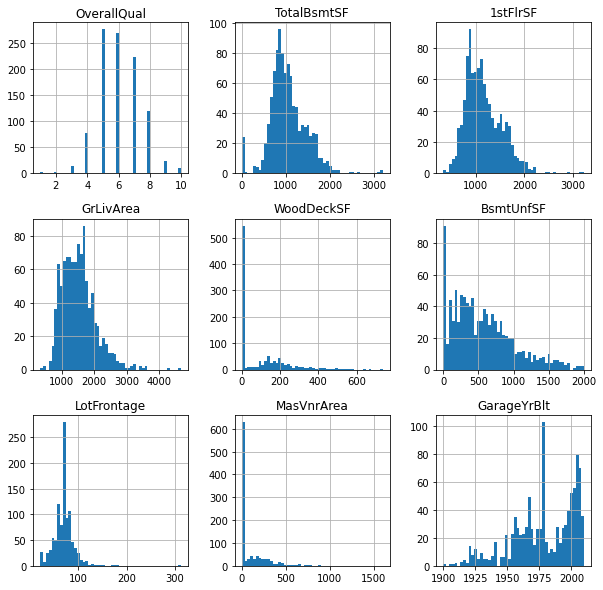

In [29]:
# Let's explore the change in the distribution after the median imputation.

X_train = pd.DataFrame(X_train,columns=cols_to_use)
X_train.hist(bins=50,figsize=(10,10))
plt.show()

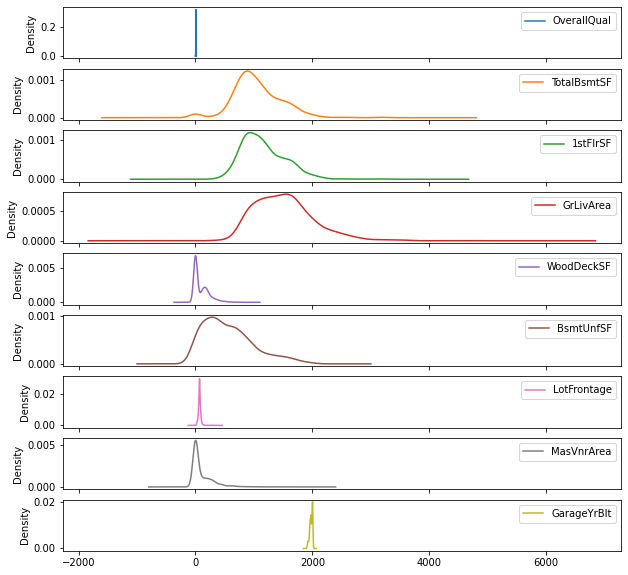

In [34]:
X_train.plot(kind='kde',subplots=True,figsize=(10,10)),
plt.show()

The tall bar at the value of the median in the histogram occurs after the imputation in the ariale LotFrontage.

**A MASSIVE NOTE OF CAUTION**: When encoding the returned numpy arrays from Scikit-learn back to a dataframe, there is the potential risk of messing the order of the features and therefore MIS-REPRESENTING the data!!

You need to be extremely careful to pass the columns to the pd.DataFrame command in the sameorder in which they were in the X_train BEFORE the transformation.

### SimpleImputer: different imputations for different features

Sometimes, we want to implement different imputation techniques to different features. How can we do this using the SimpleImpuer?

We need to use another class called **ColumnTransformer**.

In [35]:
# let's separate into training and testing set.

X_train, X_test, y_train, y_test = train_test_split(
    data[cols_to_use],  # predictors only
    data['SalePrice'],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [36]:
# let's look at the missing values
X_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

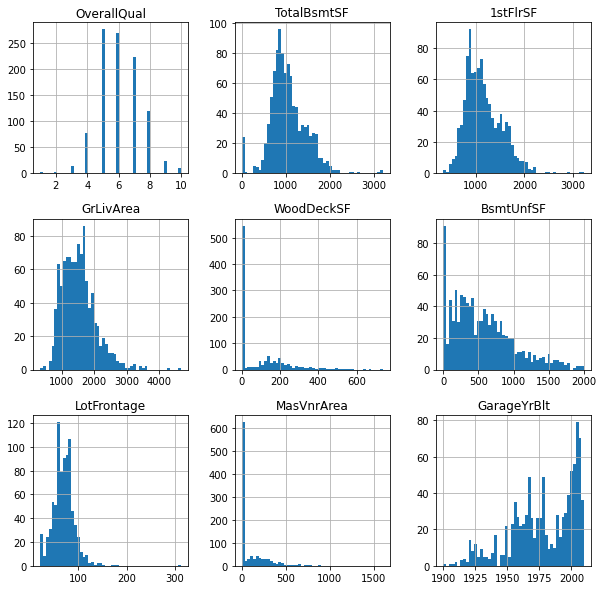

In [39]:
# let's look at the distributions of the variables to decide
# whether we use the mean of the median.

X_train.hist(bins=50,figsize=(10,10))
plt.show()

For this demo, I will impute LotFrontage with the mean, and MasVnrArea and GarageYrBlt with the median, as those variables are quite skewed.

In [54]:
# First we need to make list, indicating which features, 
# will be imputed with each method.

numeric_features_mean = ['LotFrontage']
numeric_features_median = ['MasVnrArea','GarageYrBlt']

# Then we pass the features list and the transformers to the 
# column transformer.

# We need to add 'remainder = passthrough' to indicate what we want
# All the columns returned at the end of the transformation
# and not just the engineered ones, which is the default
# behaviour of ColumnTransformer.

preprocessor = ColumnTransformer(transformers=[
    ('mean_imputer', SimpleImputer(strategy='mean'), numeric_features_mean),
    ('median_imputer',SimpleImputer(strategy='median'),numeric_features_median)
],remainder='passthrough')

In [55]:
# Now we fit the preprocessor:

preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('mean_imputer', SimpleImputer(),
                                 ['LotFrontage']),
                                ('median_imputer',
                                 SimpleImputer(strategy='median'),
                                 ['MasVnrArea', 'GarageYrBlt'])])

In [61]:
# we can explore the imputers like this:

preprocessor.transformers

[('mean_imputer', SimpleImputer(), ['LotFrontage']),
 ('median_imputer',
  SimpleImputer(strategy='median'),
  ['MasVnrArea', 'GarageYrBlt'])]

In [63]:
# And we can look at the parameters learned
# by the imputers like this:

# for the mean imputer:
preprocessor.named_transformers_['mean_imputer'].statistics_

array([69.66866747])

In [64]:
# and we can corroborate the value with the one obtained
# manually from the train set.

X_train[numeric_features_mean].mean()

LotFrontage    69.668667
dtype: float64

In [65]:
# for the median imputer:
preprocessor.named_transformers_['median_imputer'].statistics_

array([   0., 1979.])

In [66]:
# and we can corroborate the value with the one obtained
# manually from the train set.

X_train[numeric_features_median].median()

MasVnrArea        0.0
GarageYrBlt    1979.0
dtype: float64

In [ ]:
# and now we can imputer the data
X_train = preprocessor.transform(X_train)


In [70]:
# and check that it worked
np.mean(np.isnan(X_train))

0.0

In [71]:
# and now we can impute the test set
X_test = preprocessor.transform(X_test)

# and check that it worked
np.mean(np.isnan(X_test))

0.0

In [72]:
# remember that the returned data is a NumPy array:

X_train

array([[  69.66866747,  573.        , 1998.        , ..., 2034.        ,
         576.        ,  318.        ],
       [  69.66866747,    0.        , 1996.        , ..., 1291.        ,
         307.        ,  288.        ],
       [  50.        ,    0.        , 1979.        , ...,  858.        ,
         117.        ,  162.        ],
       ...,
       [  68.        ,    0.        , 1978.        , ..., 1902.        ,
           0.        ,    0.        ],
       [  69.66866747,   18.        , 2003.        , ..., 1557.        ,
         143.        , 1374.        ],
       [  58.        ,   30.        , 1998.        , ..., 1839.        ,
           0.        , 1195.        ]])

In [75]:
# If we want to convert the array into a dataframe, we need to be 
# careful with the column order.

# We can explore the features used by each transformer
# including those in the remainder ( the ones that were not transformed):

preprocessor.transformers_

[('mean_imputer', SimpleImputer(), ['LotFrontage']),
 ('median_imputer',
  SimpleImputer(strategy='median'),
  ['MasVnrArea', 'GarageYrBlt']),
 ('remainder', 'passthrough', [0, 1, 2, 3, 4, 5])]